Logistic Regression

c:\Users\prem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65     11720
           1       0.81      0.57      0.67     13464
           2       0.94      0.97      0.96    126942

    accuracy                           0.91    152126
   macro avg       0.80      0.73      0.76    152126
weighted avg       0.91      0.91      0.91    152126



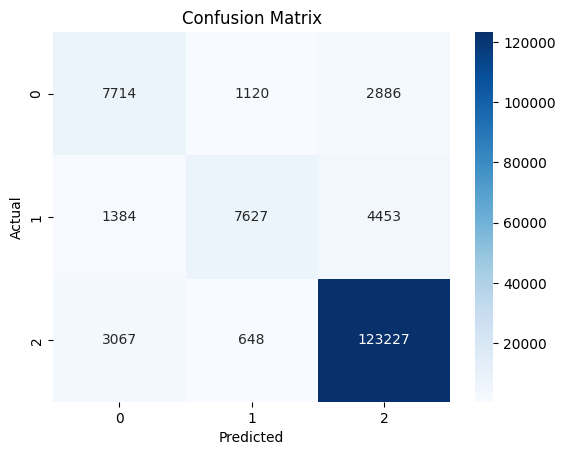

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

#load the data set
df=pd.read_csv(r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Train_dataset.csv")

#Define features and traget variable
X =df.drop("IncidentGrade",axis=1)
y =df["IncidentGrade"]

#split the dataset into traning and Validation sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

#intialize logistic Regression
logreg=LogisticRegression(C=100,penalty='l1', solver='liblinear')

logreg=logreg.fit(X_train,y_train)

#Evaluate the model on validation data
y_pred= logreg.predict(X_val)

print("Classification Report:")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

#load the data set
df=pd.read_csv(r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Train_dataset.csv")

#Define features and traget variable
X =df.drop("IncidentGrade",axis=1)
y =df["IncidentGrade"]

#split the dataset into traning and Validation sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

#Initialize Decision Tree Classifier

dtree= DecisionTreeClassifier(criterion="gini",splitter='best', max_depth= 20, min_samples_split=4, min_samples_leaf=1, 
                               max_features= 'log2', random_state=42)

# Evaluate the model on validation data
dtree = dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_val)
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82     11720
           1       0.91      0.87      0.89     13464
           2       0.99      0.98      0.98    126942

    accuracy                           0.96    152126
   macro avg       0.89      0.91      0.90    152126
weighted avg       0.97      0.96      0.96    152126

Confusion Matrix:
[[ 10361    670    689]
 [  1156  11778    530]
 [  2029    557 124356]]


Random Forest Classifier

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV ,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint

#load the data set
df=pd.read_csv(r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Train_dataset.csv")

#Define features and traget variable
X =df.drop("IncidentGrade",axis=1)
y =df["IncidentGrade"]

#split the dataset into traning and Validation sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Initialize Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = None, max_depth = 30, 
                            bootstrap = True, random_state=42)

rf = rf.fit(X_train,y_train)
# Evaluate the best model on validation data
y_pred = rf.predict(X_val)

# Print results
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11720
           1       0.97      0.98      0.97     13464
           2       1.00      1.00      1.00    126942

    accuracy                           0.99    152126
   macro avg       0.98      0.98      0.98    152126
weighted avg       0.99      0.99      0.99    152126

Confusion Matrix:
[[ 11418    216     86]
 [   183  13141    140]
 [   117    169 126656]]


Gradient Boosting Machines - XGBoost

In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from functools import partial

#load the data set
df=pd.read_csv(r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Train_dataset.csv")

#Define features and traget variable
X =df.drop("IncidentGrade",axis=1)
y =df["IncidentGrade"]

#split the dataset into traning and Validation sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost Classifier
xgb = xgb.XGBClassifier(subsample = 0.8, n_estimators = 200, max_depth = 9, learning_rate = 0.2, colsample_bytree = 1.0,
                        random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb = xgb.fit(X_train,y_train)
# Evaluate the model on validation data
y_pred = xgb.predict(X_val)

# Print the evaluation results
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

c:\Users\prem\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:00:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11720
           1       0.96      0.97      0.96     13464
           2       1.00      1.00      1.00    126942

    accuracy                           0.99    152126
   macro avg       0.97      0.97      0.97    152126
weighted avg       0.99      0.99      0.99    152126

Confusion Matrix:
[[ 11118    344    258]
 [   280  13001    183]
 [   404    206 126332]]


In [5]:
import pandas as pd

report = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy':[0.91,0.96,0.99,0.99],
    'Macro-F1 Score':[ 0.76, 0.90, 0.98, 0.97],
    'Precision': [0.80,0.89,0.98,0.97],
    'Recall': [0.73,0.91,0.98 ,0.97]
}

# Convert to DataFrame
df = pd.DataFrame(report)

# Print comparison table
print("Comparison Table:")
print(df.to_string(index=False))

# Find the best model based on Macro-F1 Score
best_model = df.loc[df['Macro-F1 Score'].idxmax()]

# Print the best model
print("\nBest Model Based on Macro-F1 Score:")
print(best_model)

Comparison Table:
              Model  Accuracy  Macro-F1 Score  Precision  Recall
Logistic Regression      0.91            0.76       0.80    0.73
      Decision Tree      0.96            0.90       0.89    0.91
      Random Forest      0.99            0.98       0.98    0.98
            XGBoost      0.99            0.97       0.97    0.97

Best Model Based on Macro-F1 Score:
Model             Random Forest
Accuracy                   0.99
Macro-F1 Score             0.98
Precision                  0.98
Recall                     0.98
Name: 2, dtype: object


Feature Importance and Error Analysis

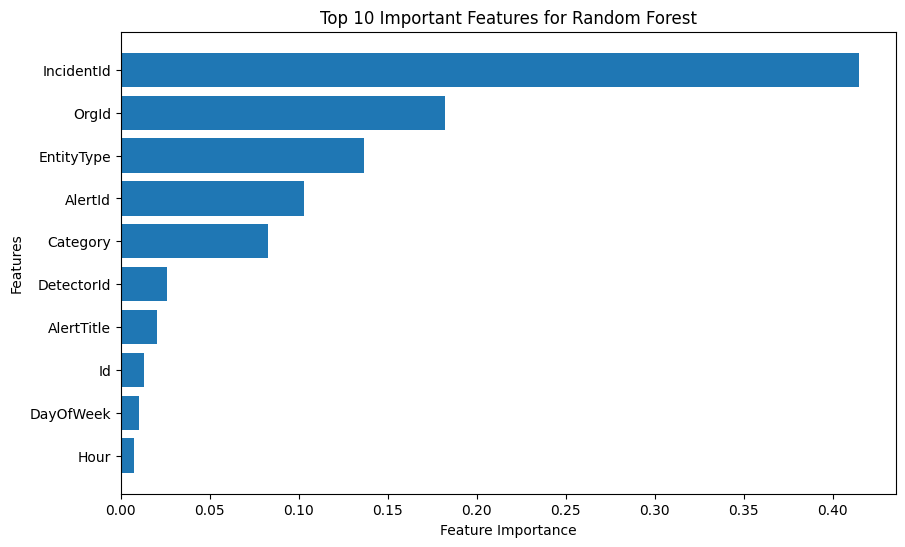

                   Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
396217   618475294502    239       89766  1233895           7    0.013667   
385613  1236950582357     56      127937   119184           6    0.011390   
416218  1236950582027    350       35994   239468           1    0.002278   
168089   412316863583     33       37760   303741           6    0.011390   
546508   670014900299    221       49462   448805           6    0.011390   

        Category  EntityType  EvidenceRole  DeviceId  ...  ResourceIdName  \
396217         5           0             1     98799  ...            3586   
385613         5           5             1     98799  ...            3586   
416218         5           5             1     98799  ...            3586   
168089         5           5             1     98799  ...            3586   
546508         5           5             1     98799  ...            3586   

        OSFamily  OSVersion  CountryCode  State   City  Year     Month  \


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Get feature importances from the best Random Forest model
importances = rf.feature_importances_

features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features for Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

# Identify misclassified samples
misclassified_idx = (y_val != y_pred)

# Extract the misclassified samples
misclassified_samples = X_val[misclassified_idx].copy()

# Display the first 5 misclassified samples
print(misclassified_samples.head(5))

# Evaluate the model's predictions
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

Saving the Best Model

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV ,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from joblib import dump
from imblearn.pipeline import Pipeline

#load the data set
df=pd.read_csv(r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Train_dataset.csv")

#Define features and traget variable
X =df.drop("IncidentGrade",axis=1)
y =df["IncidentGrade"]

#split the dataset into traning and Validation sets
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data for class imbalance
smote = SMOTE(random_state=42)

# Initialize Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = None, max_depth = 30, 
                            bootstrap = True, random_state=42)

# Create the Pipeline
pipeline = Pipeline(steps=[
    ('smote', smote),
    ('classifier', rf)
])

# Fit the Pipeline
pipeline.fit(X_train, y_train)

# Evaluate the best model on validation data
y_pred = pipeline.predict(X_val)

# Print results
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Save the best model to a pickle file
model_path = r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\BestModel.pkl"
dump(rf, model_path)
print(f"Model saved to {model_path}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     11720
           1       0.95      0.96      0.96     13464
           2       1.00      0.99      0.99    126942

    accuracy                           0.99    152126
   macro avg       0.95      0.97      0.96    152126
weighted avg       0.99      0.99      0.99    152126

Confusion Matrix:
[[ 11271    373     76]
 [   425  12940     99]
 [   923    305 125714]]
Model saved to C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\BestModel.pkl


Evaluation of Selected Random Forest Model on Test Data

In [2]:
import pandas as pd
from joblib import load
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

#load the best model
model_path=r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\BestModel.pkl"
best_rf=load(model_path)

#load the test dataset
test_data_path=r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Test_dataset.csv"
test_df=pd.read_csv(test_data_path)

#seperate features and target
X_test=test_df.drop("IncidentGrade",axis=1)
y_test=test_df["IncidentGrade"]

#Make Prediction
y_test_pred= best_rf.predict(X_test)

#Evaluate the model on the test set
print("\n Classification Report on Test Data")
report=classification_report(y_test,y_test_pred,output_dict=True)
print(classification_report(y_test,y_test_pred))

## Extract macro-F1 score, precision, and recall from the report

macro_f1=report["macro avg"]["f1-score"]
macro_precision=report["macro avg"]["precision"]
macro_recall=report["macro avg"]["recall"]

print("Exracted report")
print("\nMacro-F1 Score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))

# Confusion Matrix
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))


 Classification Report on Test Data
              precision    recall  f1-score   support

           0       0.62      0.92      0.74     20558
           1       0.56      0.72      0.63     16162
           2       1.00      0.93      0.96    216503

    accuracy                           0.92    253223
   macro avg       0.73      0.86      0.78    253223
weighted avg       0.94      0.92      0.92    253223

Exracted report

Macro-F1 Score: 0.78
Macro Precision: 0.73
Macro Recall: 0.86

Confusion Matrix on Test Data:
[[ 18900   1388    270]
 [  3739  11693    730]
 [  7668   7722 201113]]
